# Exploratory Data Analysis (EDA)

In this notebook, we will conduct EDA to analyze structured data, visualize data and interpret the results.

The agenda is as follow:

1. Load data by Pandas
2. Target/Label/Dependent Variables vs Features/Independent Variables
3. Statistics for Numerical Columns
4. Statistics for Categorical Columns
5. Distributions of Diagnosis
6. Variable Correlations with Diagnosis

### Import Libraries

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
from IPython.core.pylabtools import figsize
# Scipy helper functions
import scipy
from scipy.stats import percentileofscore
from scipy import stats

In [2]:
print(pd.__version__)

2.2.1


## Dataset
We are using data on medical disorder diagnosis collected from https://www.kaggle.com/datasets/cid007/mental-disorder-classification which is a great collection of datasets for machine learning model testing.

# EDA

Load data and examine their main characteristic

In [3]:
import pandas as pd
file_name = "Dataset-Mental-Disorders.csv"
df_data = pd.read_csv(file_name, sep=',', index_col=None)

In [4]:
# check the size of the dataset
print ("The size of the Metal Disorders dataset :", df_data.shape)

print("\n\033[1mDF data head :\033[0m")  # display in bold to aid readability
print(df_data.head(2))

print("\n\033[1mDF data tail :\033[0m")
print(df_data.tail(2))

The size of the Metal Disorders dataset : (120, 19)

DF data head :
  Patient Number  Sadness Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01  Usually   Seldom  Sometimes       Sometimes        YES   
1     Patiant-02  Usually   Seldom    Usually       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO                YES            YES   
1                  NO               NO                 NO             NO   

  Overthinking Sexual Activity Concentration  Optimisim Expert Diagnose  
0          YES       3 From 10     3 From 10  4 From 10  Bipolar Type-2  
1           NO       4 From 10     2 From 10  5 From 10      Depression  

DF data tail :
    Patient Number    Sadness   Euphoric

 #### Rename to correct typo error in 3 column names

In [5]:
# Define a dictionary for columns renaming
column_rename_dict = {
    'Sleep dissorder': 'Sleep disorder',
    'Anorxia': 'Anorexia',
    'Optimisim': 'Optimism'
}

df_data.rename(columns=column_rename_dict, inplace=True)

In [6]:
# Concatenate the first 2 rows with the last 2 rows
result = pd.concat([df_data.head(2), df_data.tail(2)])
result

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression
119,Patiant-120,Sometimes,Usually,Seldom,Usually,NO,NO,NO,YES,YES,NO,YES,YES,NO,NO,7 From 10,3 From 10,8 From 10,Normal


In [7]:
# Check the data structure (use .info())
print ("Data structure - Mental Disorder Diagnosis :")
df_data.info()

Data structure - Mental Disorder Diagnosis :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep disorder       120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorexia             120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activ

### Introduce new derived columns with numerical or binary-like (YES / NO) values to expand the possibilities of generating additional charts and graphs

In [8]:
# Map various emotions/condition to a level in numeric value (the greater the value, the higher the intensity)
level_mapping = {
    'Seldom': 1,
    'Sometimes': 2,
    'Usually': 3,
    'Most-Often': 4
}

# Add columns with mapped values
df_data['SadnessLevel'] = df_data['Sadness'].map(level_mapping)
df_data['EuphoricLevel'] = df_data['Euphoric'].map(level_mapping)
df_data['ExhaustedLevel'] = df_data['Exhausted'].map(level_mapping)
df_data['SleepDisorderLevel'] = df_data['Sleep disorder'].map(level_mapping)

# Displaying the updated DataFrame
df_data

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,...,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose,SadnessLevel,EuphoricLevel,ExhaustedLevel,SleepDisorderLevel
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2,3,1,2,2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,NO,NO,4 From 10,2 From 10,5 From 10,Depression,3,1,3,2
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1,2,4,2,2
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2,3,1,3,4
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,YES,YES,5 From 10,5 From 10,6 From 10,Normal,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,NO,YES,2 From 10,5 From 10,3 From 10,Depression,4,1,3,2
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1,2,2,2,1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2,3,2,3,2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,YES,YES,7 From 10,7 From 10,7 From 10,Depression,3,2,1,1


In [9]:
columns_to_extract = ['Sexual Activity', 'Concentration', 'Optimism']

for column in columns_to_extract:
    new_column_name = column.replace(' ', '') + 'Level'                      # Remove space in new column name (e.g. replace "Sexual ActivityLeveL" with "SexualActivityLevel")
    df_data[new_column_name] = df_data[column].str.extract(r'^(\d+)\sFrom')  # Extract only the numeric portion of the value before " From.."
    df_data[new_column_name] = pd.to_numeric(df_data[new_column_name])
    
df_data

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,...,Concentration,Optimism,Expert Diagnose,SadnessLevel,EuphoricLevel,ExhaustedLevel,SleepDisorderLevel,SexualActivityLevel,ConcentrationLevel,OptimismLevel
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,3 From 10,4 From 10,Bipolar Type-2,3,1,2,2,3,3,4
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,2 From 10,5 From 10,Depression,3,1,3,2,4,2,5
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,5 From 10,7 From 10,Bipolar Type-1,2,4,2,2,6,5,7
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,2 From 10,2 From 10,Bipolar Type-2,3,1,3,4,3,2,2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,5 From 10,6 From 10,Normal,3,3,2,2,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,5 From 10,3 From 10,Depression,4,1,3,2,2,5,3
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,7 From 10,8 From 10,Bipolar Type-1,2,2,2,1,6,7,8
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,5 From 10,3 From 10,Bipolar Type-2,3,2,3,2,1,5,3
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,7 From 10,7 From 10,Depression,3,2,1,1,7,7,7


In [10]:
# Lastly, add another derived column 'HasMentalDisorder' and set as NO when Diagnosis is 'Normal', otherwise set as YES to indicate the patient has an indicative medical disorder condition.
df_data['HasMentalDisorder'] = np.where(df_data['Expert Diagnose'] == 'Normal', 'NO', 'YES')

In [11]:
df_data

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,...,Optimism,Expert Diagnose,SadnessLevel,EuphoricLevel,ExhaustedLevel,SleepDisorderLevel,SexualActivityLevel,ConcentrationLevel,OptimismLevel,HasMentalDisorder
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,4 From 10,Bipolar Type-2,3,1,2,2,3,3,4,YES
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,5 From 10,Depression,3,1,3,2,4,2,5,YES
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,7 From 10,Bipolar Type-1,2,4,2,2,6,5,7,YES
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,2 From 10,Bipolar Type-2,3,1,3,4,3,2,2,YES
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,6 From 10,Normal,3,3,2,2,5,5,6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,3 From 10,Depression,4,1,3,2,2,5,3,YES
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,8 From 10,Bipolar Type-1,2,2,2,1,6,7,8,YES
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,3 From 10,Bipolar Type-2,3,2,3,2,1,5,3,YES
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,7 From 10,Depression,3,2,1,1,7,7,7,YES


### Randomly browse through the data by diagnosis group (Normal vs Not Normal)

In [12]:
df_data.rename(columns={'Expert Diagnose': 'Diagnosis'}, inplace=True) # Rename with inplace set to true (change the DataFrame itself)

df_data[df_data['Diagnosis']=='Normal'].head()   # Display 5 records whereby Diagnosis is Normal, for reference

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,...,Optimism,Diagnosis,SadnessLevel,EuphoricLevel,ExhaustedLevel,SleepDisorderLevel,SexualActivityLevel,ConcentrationLevel,OptimismLevel,HasMentalDisorder
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,6 From 10,Normal,3,3,2,2,5,5,6,NO
7,Patiant-08,Usually,Sometimes,Sometimes,Sometimes,NO,NO,NO,NO,YES,...,5 From 10,Normal,3,2,2,2,5,5,5,NO
10,Patiant-11,Seldom,Sometimes,Seldom,Seldom,NO,NO,NO,YES,NO,...,8 From 10,Normal,1,2,1,1,5,7,8,NO
13,Patiant-14,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,YES,NO,...,5 From 10,Normal,3,3,2,2,5,7,5,NO
16,Patiant-17,Sometimes,Usually,Sometimes,Sometimes,NO,NO,NO,NO,YES,...,6 From 10,Normal,2,3,2,2,5,4,6,NO


In [13]:
df_data[~(df_data['Diagnosis']=='Normal')].head()   # Display 5 records whereby Diagnosis is NOT Normal, for reference

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,...,Optimism,Diagnosis,SadnessLevel,EuphoricLevel,ExhaustedLevel,SleepDisorderLevel,SexualActivityLevel,ConcentrationLevel,OptimismLevel,HasMentalDisorder
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,4 From 10,Bipolar Type-2,3,1,2,2,3,3,4,YES
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,5 From 10,Depression,3,1,3,2,4,2,5,YES
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,7 From 10,Bipolar Type-1,2,4,2,2,6,5,7,YES
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,2 From 10,Bipolar Type-2,3,1,3,4,3,2,2,YES
5,Patiant-06,Usually,Sometimes,Sometimes,Most-Often,NO,YES,YES,YES,NO,...,5 From 10,Depression,3,2,2,4,3,5,5,YES


In [14]:
df_data   # Display all cases (regardless of Diagnosis) for reference

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,...,Optimism,Diagnosis,SadnessLevel,EuphoricLevel,ExhaustedLevel,SleepDisorderLevel,SexualActivityLevel,ConcentrationLevel,OptimismLevel,HasMentalDisorder
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,4 From 10,Bipolar Type-2,3,1,2,2,3,3,4,YES
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,5 From 10,Depression,3,1,3,2,4,2,5,YES
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,7 From 10,Bipolar Type-1,2,4,2,2,6,5,7,YES
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,2 From 10,Bipolar Type-2,3,1,3,4,3,2,2,YES
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,6 From 10,Normal,3,3,2,2,5,5,6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,3 From 10,Depression,4,1,3,2,2,5,3,YES
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,8 From 10,Bipolar Type-1,2,2,2,1,6,7,8,YES
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,3 From 10,Bipolar Type-2,3,2,3,2,1,5,3,YES
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,7 From 10,Depression,3,2,1,1,7,7,7,YES


Except target variable **Diagnosis**, the original dataset contains lots of mental disorder attributes, i.e., features. It mainly consist of Categorical features, such as:

  - Sadness (Most-Often, Seldom, Sometimes, Usually);


  - Mood Swing (YES, NO).
  
However, a number of numeric or binary-like columns were derived and added at above Code Cell 8 to 10. This is to expand the possibilities of generating additional charts and graphs for analysis.


### Statistics information

In [15]:
df_data.describe()  # shows statistical information of those derived Numeric columns/features which were added

,SadnessLevel,EuphoricLevel,ExhaustedLevel,SleepDisorderLevel,SexualActivityLevel,ConcentrationLevel,OptimismLevel
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.550000,1.933333,2.633333,2.458333,4.741667,4.250000,4.466667
std,0.924458,0.923396,1.020243,0.977871,2.010459,1.797524,1.991298
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000
50%,3.000000,2.000000,3.000000,2.000000,5.000000,4.000000,4.000000
75%,3.000000,2.000000,3.250000,3.000000,6.000000,5.000000,6.000000
max,4.000000,4.000000,4.000000,4.000000,9.000000,8.000000,9.000000


#### Based on the above statistics information, there are at least 2 groups of different scales, whereby the levels of:
- Sadness, Euphoric, Exhausted, and SleepDisorder are from 1 to 4, whereas 
- SexualActivity, Concentration, and Optimism are from 1 to 10, but their max reached 8 or 9 only.

### Value Counts for Categorical Columns

In [16]:
# Sort the DataFrame by the 'Diagnosis' column alphabetically
df_data.sort_values(by='Diagnosis', inplace=True)

# Print the value counts for categorical columns
for col in df_data.columns:
    if df_data[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df_data[col].value_counts())


Column Name: Patient Number
Patient Number
Patiant-22     1
Patiant-73     1
Patiant-119    1
Patiant-110    1
Patiant-66     1
              ..
Patiant-61     1
Patiant-86     1
Patiant-55     1
Patiant-92     1
Patiant-120    1
Name: count, Length: 120, dtype: int64

Column Name: Sadness
Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64

Column Name: Euphoric
Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64

Column Name: Exhausted
Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: count, dtype: int64

Column Name: Sleep disorder
Sleep disorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: count, dtype: int64

Column Name: Mood Swing
Mood Swing
NO     63
YES    57
Name: count, dtype: int64

Column Name: Suicidal thoughts
Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

Column Name: Anorexia


#### Given the presented outcome, the column 'Suicidal thoughts' shows two instances of "YES" counts. This suggests the possibility of space(s) in 1 record containing the "YES" value.

Column Name: Suicidal thoughts

Suicidal thoughts

NO      63

YES     56

YES      1

Name: count, dtype: int64

#### As such, let's trim the values of this column to remove spaces, and check the value count of this column again.

In [17]:
# Preprocess the column values to remove leading and trailing whitespace
df_data['Suicidal thoughts'] = df_data['Suicidal thoughts'].str.strip()

# Check value count again to ensure it is okay now
print('\nColumn Name:', col,)
print(df_data['Suicidal thoughts'].value_counts())


Column Name: HasMentalDisorder
Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64


#### The above value count is correct now since "YES" is represented once, not twice anymore.

Check Distribution of only Diagnosis column

In [18]:
df_data['Diagnosis'].value_counts()

Diagnosis
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

In [19]:
df_data['Diagnosis'].describe()

count                120
unique                 4
top       Bipolar Type-2
freq                  31
Name: Diagnosis, dtype: object

## Bar plot of Diagnosis

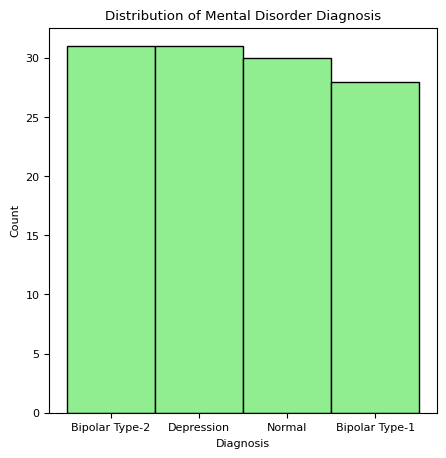

In [20]:
# Bar plot of Diagnosis
plt.bar(df_data['Diagnosis'].value_counts().index,   # X-axis shows Diagnosis, sorted alphabetically
        df_data['Diagnosis'].value_counts().values,               # Y-axis shows row/record Counts of the respective Diagnosis
         color = 'lightgreen', edgecolor = 'k', width = 1)        # light green; k is black; width of bar
plt.xlabel('Diagnosis'); plt.ylabel('Count'); plt.title('Distribution of Mental Disorder Diagnosis');
plt.xticks(list(range(0, 4)));                                    # X-axis to show integers ranging from 0 to 3 (exclusive of 4)

#### Based on the above bar plot, the dataset seems pretty balanced since the proportions are close to each other across the classes.

## Radar chart (spider chart) to visually compare quantitative columns across a set of categories/values based on the whole dataset

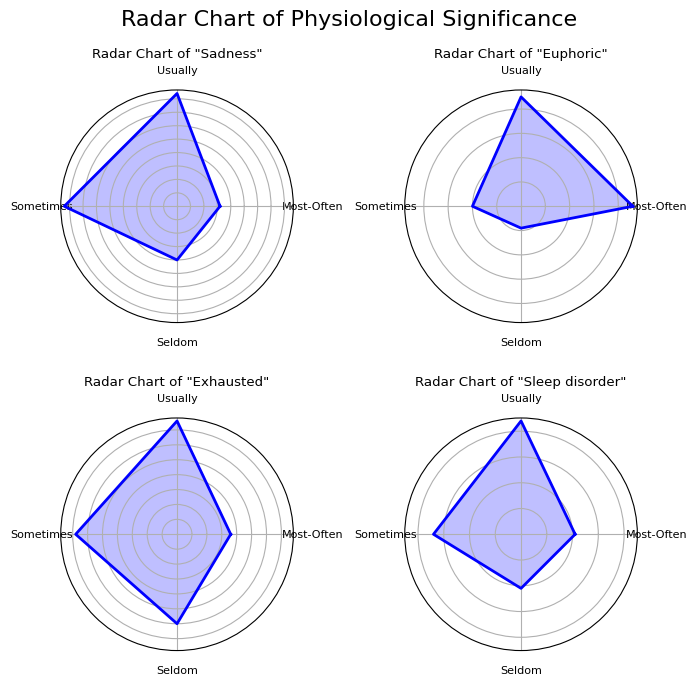

In [21]:
# Define the categorical columns to loop through
columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep disorder']

# Define the value mapping for categorical values
value_mapping = {'Most-Often': 4, 'Usually': 3, 'Sometimes': 2, 'Seldom': 1}

# Create subplots for the radar graphs
fig, axs = plt.subplots(2, 2, figsize=(7, 7), subplot_kw=dict(polar=True))

# Add main title
fig.suptitle('Radar Chart of Physiological Significance', fontsize=16)

# Loop through each column
for i, column in enumerate(columns):
    # Select the column data from the DataFrame
    column_data = df_data[column]
    
    # Convert categorical values to numerical values
    numerical_data = [value_mapping[value] for value in column_data]
    
    # Calculate the mean or frequency of each category
    categories = list(value_mapping.keys())
    category_values = [numerical_data.count(value) for value in range(1, 5)]
    
    # Plot radar chart
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values = category_values + [category_values[0]]
    angles += angles[:1]

    # Plot radar chart on the corresponding subplot
    ax = axs[i // 2, i % 2]
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid')
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Radar Chart of "{column}"')

# Adjust layout and show the radar graphs
plt.tight_layout()
plt.show()

#### Based on the above 4 radar charts, many patients chose "Usually" as their answer.
#### In addition, the shape of "Euphoric" radar chart seems rather different from the other 3 radar charts, with "Most-Often" also chosen frequently other than "Usually".

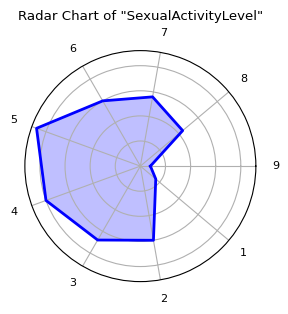

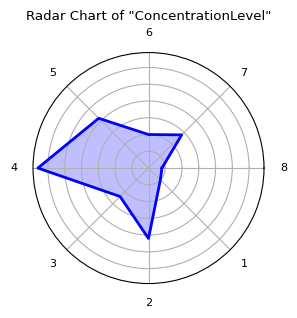

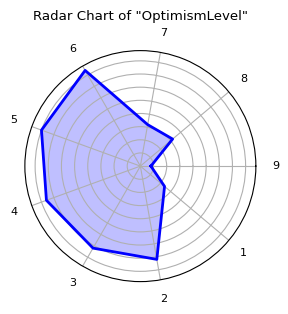

In [22]:
# Define the numeric columns to loop through
columns = ['SexualActivityLevel', 'ConcentrationLevel', 'OptimismLevel']

# Loop through each column
for column in columns:
    # Select the column data from the DataFrame
    column_data = df_data[column]
    
    # Calculate the frequency of each category
    categories = column_data.unique()
    sorted_categories = sorted(categories, reverse=True)  # Sort the categories (e.g. 1, 2, 3 etc) in reverse order

    category_values = [column_data.tolist().count(category) for category in sorted_categories]
    
    # Plot radar chart
    angles = np.linspace(0, 2 * np.pi, len(sorted_categories), endpoint=False).tolist()
    values = category_values + [category_values[0]]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid')
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(sorted_categories)
    ax.set_title(f'Radar Chart of "{column}"')
    plt.show()

#### Only a small subset of patients exhibit extreme low / high values (e.g. 1, 8, 9) in the above 3 radar charts.

## we can also apply histogram directly on their derived numerical columns to see density distribution

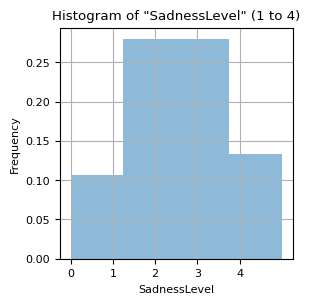

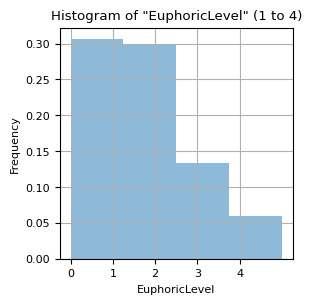

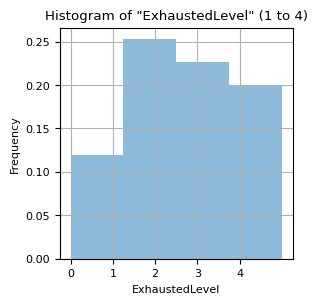

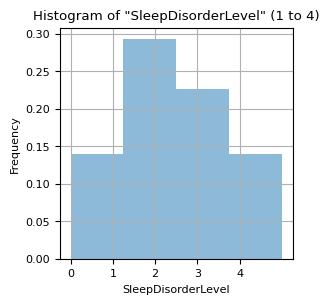

In [23]:
# Show distribution of our dataset through looping
for emotion in ['SadnessLevel', 'EuphoricLevel', 'ExhaustedLevel', 'SleepDisorderLevel']:
    plt.figure(figsize=(3, 3))  # Adjust the figure size here (width, height)
    
    # Show emotion level distribution of our dataset
    df_data[emotion].plot.hist(bins=4, alpha=0.5, density=True, range=(0,5))   # alpha=0.5 means 50% transparency; density=True adjusts height of histogram bars so that the total area under histogram is equal to 1.

    # Show setting
    plt.title(f'Histogram of "{emotion}" (1 to 4)')
    plt.xticks(np.arange(0, 5, step=1))
    plt.xlabel(emotion)
    plt.grid()
    plt.show()

#### The above 4 histogram charts showed that more patients experienced middle range of values (level 2 or 3), except for "Euphoric" whereby many patients experienced level 1 other than 2. 

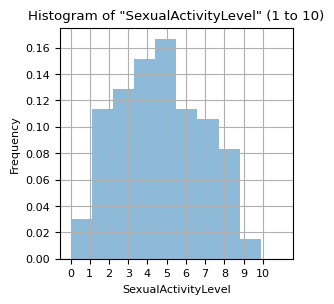

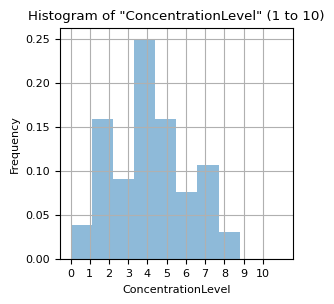

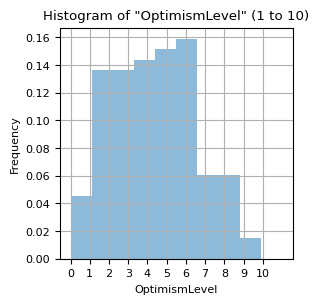

In [24]:
# show distribution of our dataset through looping
for emotion in ['SexualActivityLevel', 'ConcentrationLevel', 'OptimismLevel']:
    plt.figure(figsize=(3, 3))  # Adjust the figure size here (width, height)
    
    # Show level distribution of our dataset
    df_data[emotion].plot.hist(bins=10, alpha=0.5, density=True, range=(0,11))   # alpha=0.5 means 50% transparency; density=True adjusts height of histogram bars so that the total area under histogram is equal to 1.

    # Show setting
    plt.title(f'Histogram of "{emotion}" (1 to 10)')
    plt.xticks(np.arange(0, 11, step=1))
    plt.xlabel(emotion)
    plt.grid()
    plt.show()

#### From the above 3 histogram charts, it is evident that much lesser patients experienced extreme low/high levels (e.g. level 1, level 9, and no one in level 10).

## Group patients by Diagnosis and then check the distributions of some attributes 
### The dataset we used doesn't allow for distinguishing severity levels or ranking between certain diagnostic conditions such as Depression and Bipolar.

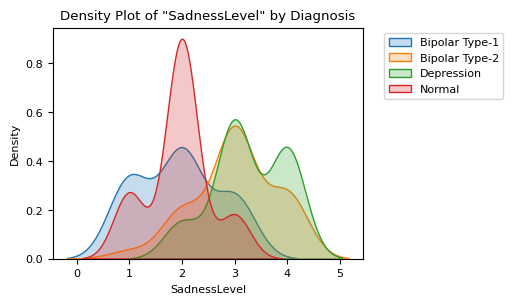

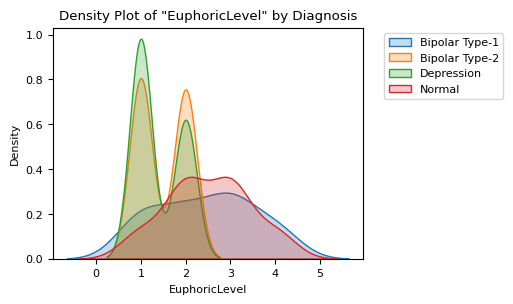

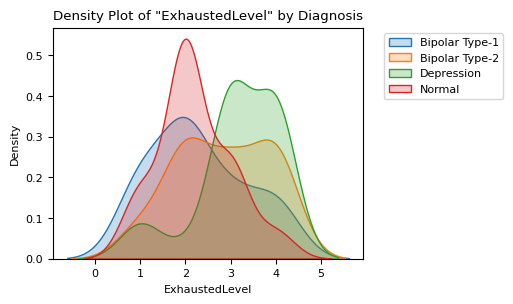

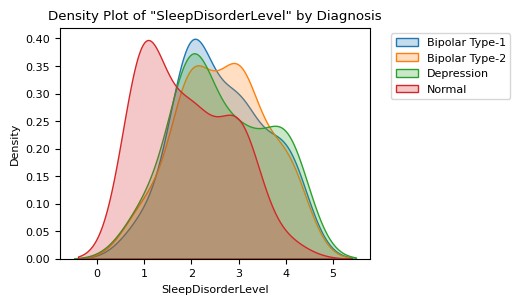

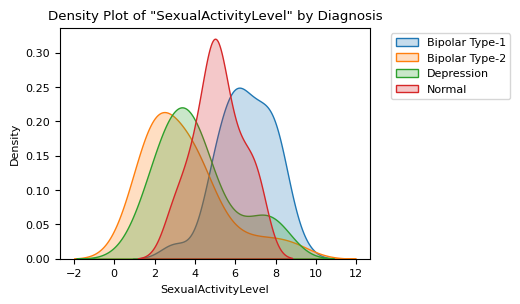

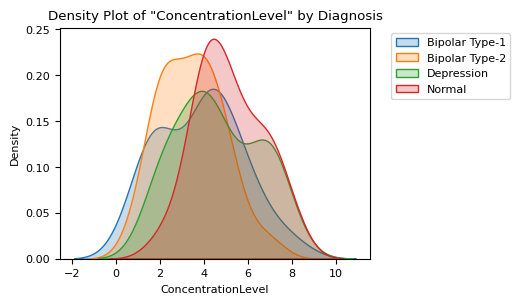

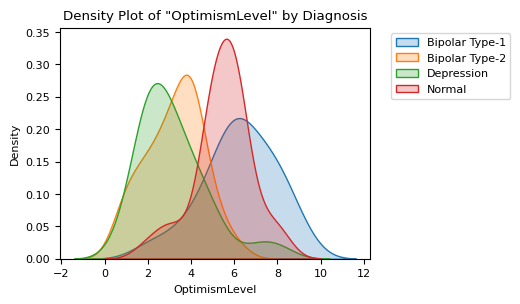

In [25]:
# kdeplot is Kernel Density Estimate (KDE) Plot

# Define the numeric levels
levels = ['SadnessLevel', 'EuphoricLevel', 'ExhaustedLevel', 'SleepDisorderLevel', 'SexualActivityLevel', 'ConcentrationLevel', 'OptimismLevel']

# Iterate over each level and create a KDE plot
for level in levels:
    plt.figure(figsize=(4, 3))  # Set the figure size
    for diagnosis in df_data['Diagnosis'].unique():
        sns.kdeplot(df_data.loc[df_data['Diagnosis'] == diagnosis, level], label=diagnosis, fill=True)
    plt.xlabel(f'{level}')
    plt.ylabel('Density')
    plt.title(f'Density Plot of "{level}" by Diagnosis')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
    plt.show()  # Show the plot for each level

#### Interestingly, patients diagnosed with "Bipolar Type-1" share certain similarities with those considered "Normal". On the other hand, "Bipolar Type-2" and "Depression" patients seem to exhibit more resemblances with each other.

## Count Plot to visualize the distribution of diagnosis across different levels of patient attributes

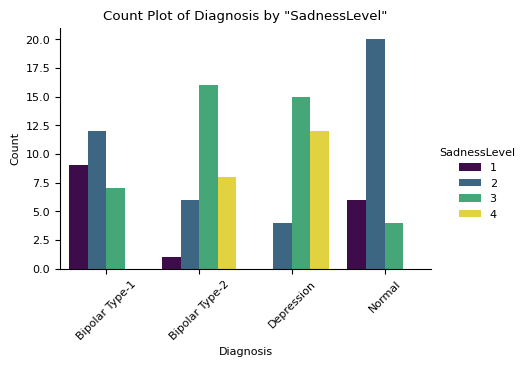

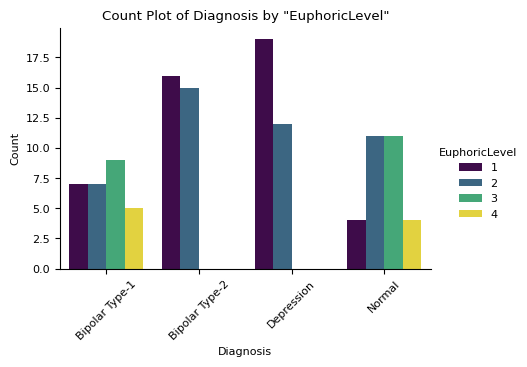

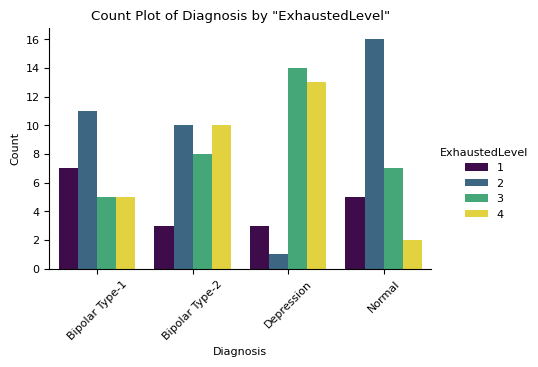

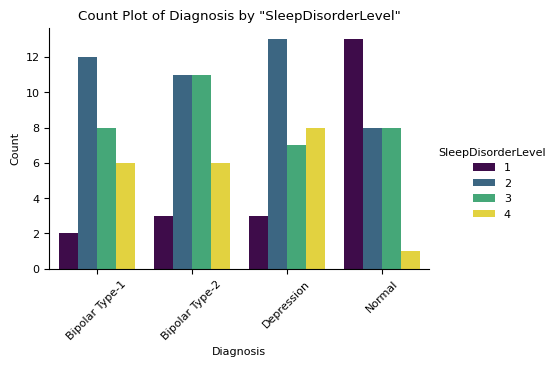

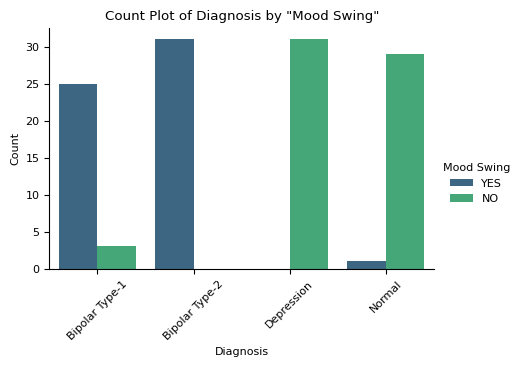

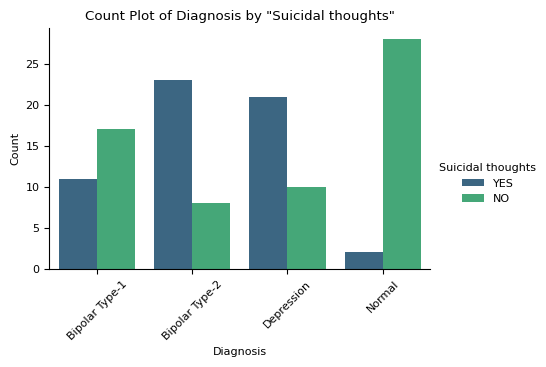

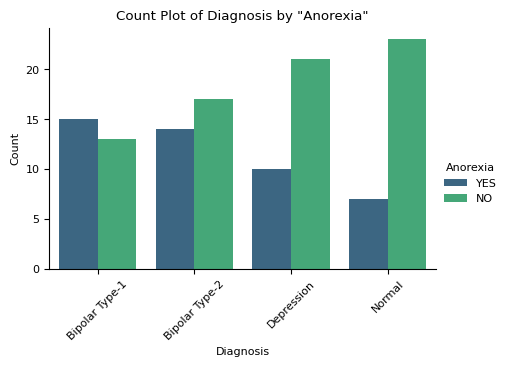

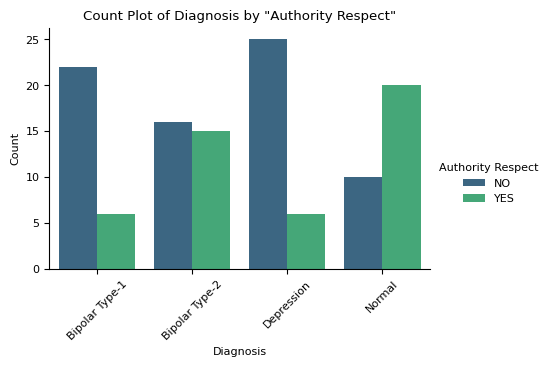

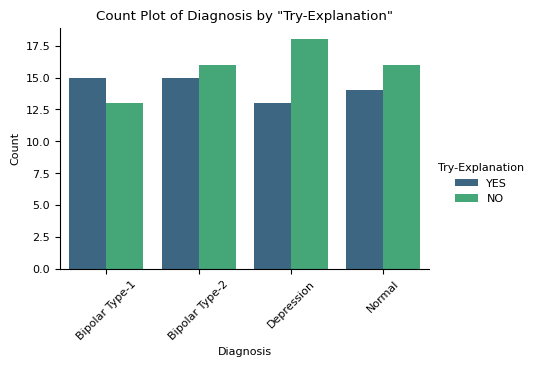

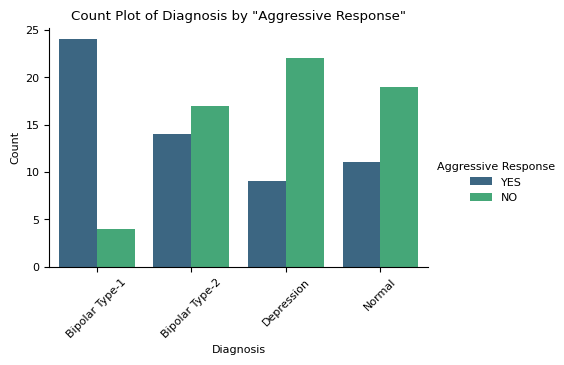

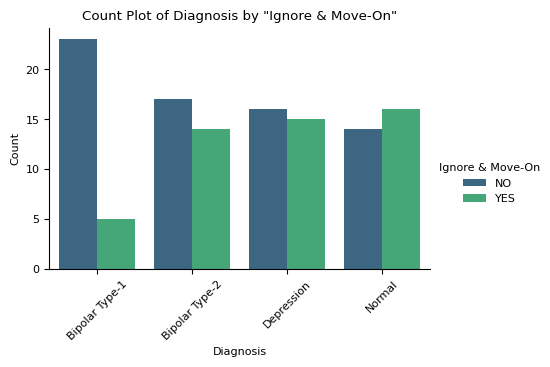

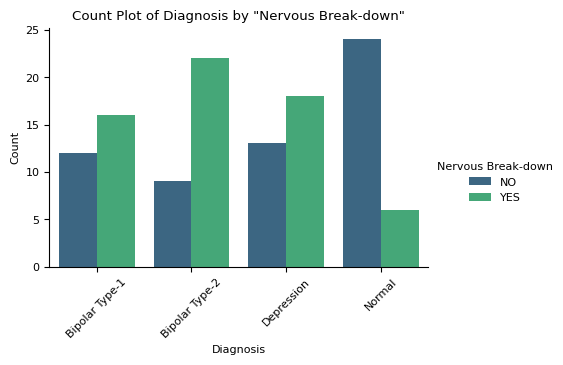

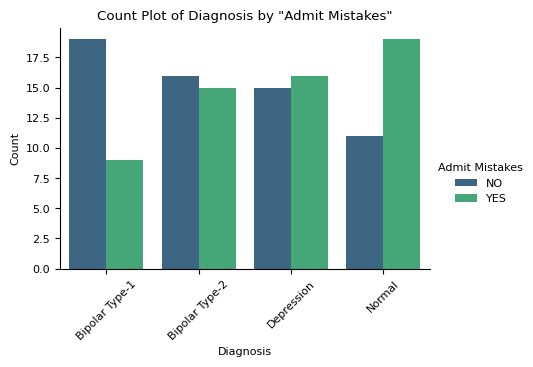

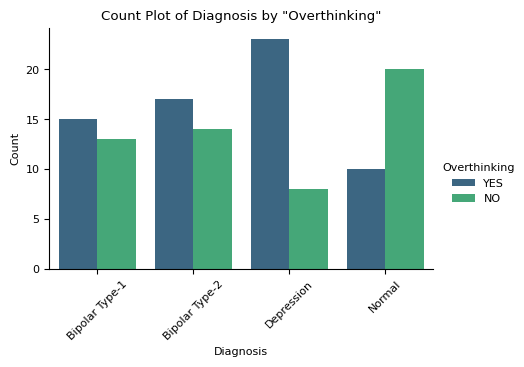

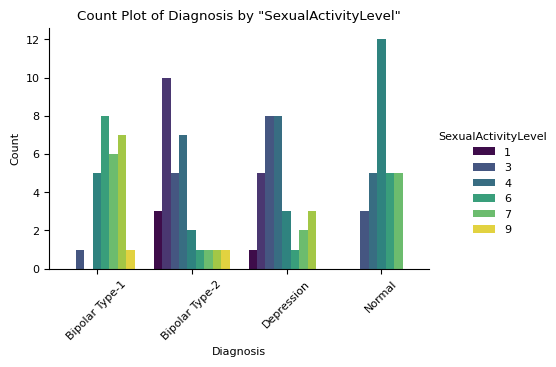

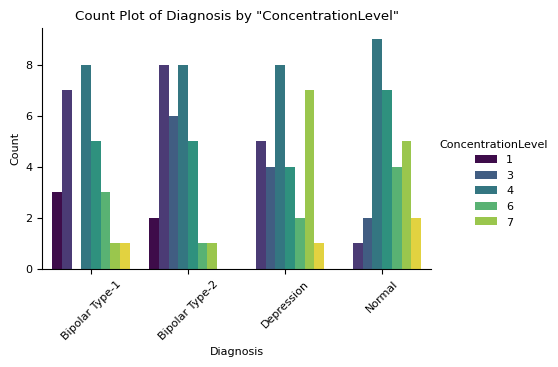

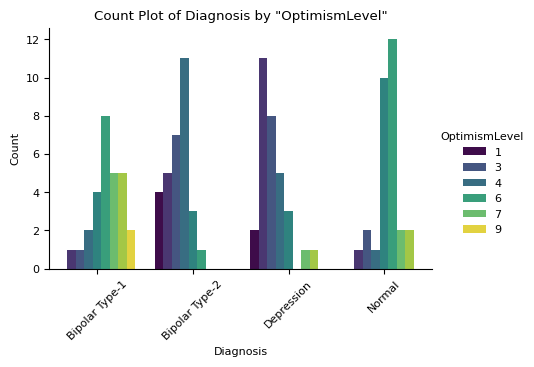

In [26]:
# Store a list of input features
input_features = ['SadnessLevel', 'EuphoricLevel', 'ExhaustedLevel', 'SleepDisorderLevel', 'Mood Swing', 'Suicidal thoughts', 'Anorexia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'SexualActivityLevel', 'ConcentrationLevel', 'OptimismLevel']

# Loop through each input feature and create count plots
for var in input_features:
    sorted_df = df_data.sort_values(by='Diagnosis')  # Sort the DataFrame by the "Diagnosis" column

    # Create count plots
    sns.catplot(data=sorted_df, x='Diagnosis', hue=var, kind='count', palette='viridis', height=3, aspect=1.5, order=sorted_df['Diagnosis'].unique())

    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(f'Count Plot of Diagnosis by "{var}"')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

## Stacked bar chart to see the "composition" of various Diagnosis conditions for each category (e.g. Sadness)

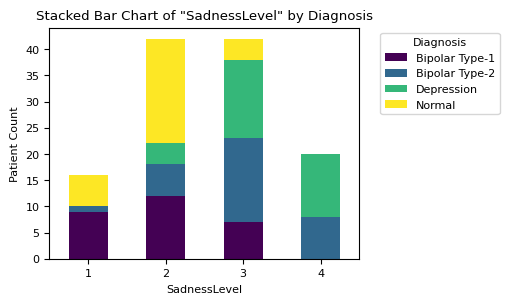

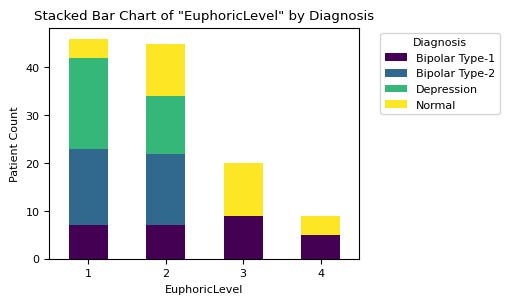

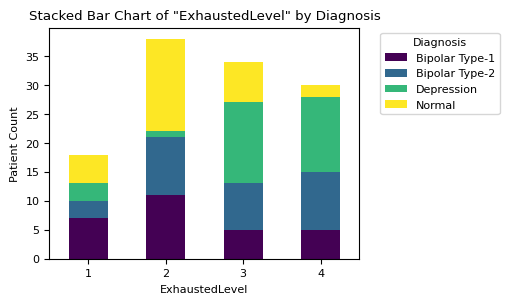

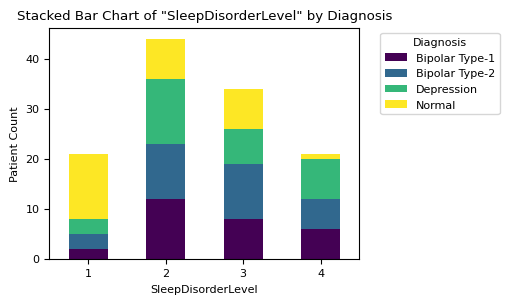

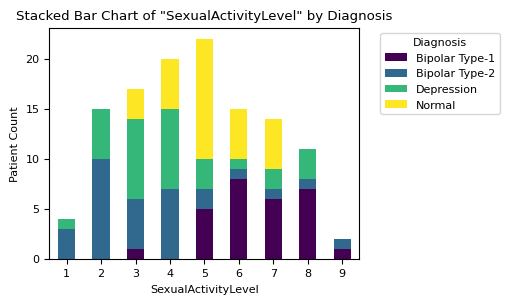

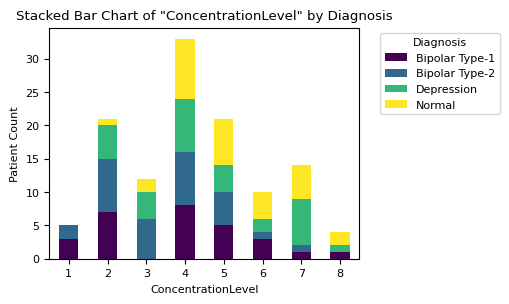

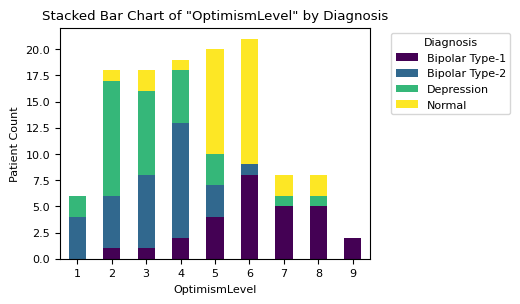

In [27]:
# List of levels to loop through
levels = ['SadnessLevel', 'EuphoricLevel', 'ExhaustedLevel', 'SleepDisorderLevel', 'SexualActivityLevel', 'ConcentrationLevel', 'OptimismLevel']

for level in levels:
    # Pivot the data to get counts of each diagnosis for each level
    pivot_data = df_data.pivot_table(index=level, columns='Diagnosis', aggfunc='size', fill_value=0)

    # Create a stacked bar chart for level vs. Diagnosis
    pivot_data.plot(kind='bar', stacked=True, cmap='viridis', figsize=(4, 3))  # Adjust the figure size here

    # Add labels and title
    plt.xlabel(level)
    plt.ylabel('Patient Count')
    plt.title(f'Stacked Bar Chart of "{level}" by Diagnosis')

    # Set x-axis labels to 0 for better readability
    plt.xticks(rotation=0)

    # Move legend outside the plot
    plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

In [28]:
# Loop through various levels, group by that level, and count occurrences of mental disorder cases
levels_to_loop = ['SadnessLevel', 'EuphoricLevel', 'ExhaustedLevel', 'SleepDisorderLevel', 'SexualActivityLevel', 'ConcentrationLevel', 'OptimismLevel']

for level in levels_to_loop:
    # Group by the current level and count occurrences of mental disorder
    group_by_level = df_data.groupby([level])['HasMentalDisorder'].value_counts()

    # Sort the values by the count of mental disorder
    group_by_level = group_by_level.sort_values(ascending=False)

    print(f"Grouped by {level}:")
    print(group_by_level)
    print("\n")

Grouped by SadnessLevel:
SadnessLevel  HasMentalDisorder
3             YES                  38
2             YES                  22
              NO                   20
4             YES                  20
1             YES                  10
              NO                    6
3             NO                    4
Name: count, dtype: int64


Grouped by EuphoricLevel:
EuphoricLevel  HasMentalDisorder
1              YES                  42
2              YES                  34
               NO                   11
3              NO                   11
               YES                   9
4              YES                   5
1              NO                    4
4              NO                    4
Name: count, dtype: int64


Grouped by ExhaustedLevel:
ExhaustedLevel  HasMentalDisorder
4               YES                  28
3               YES                  27
2               YES                  22
                NO                   16
1               YES          

## Check the relationship between HasMentalDisorder (YES or NO) and various derived numerical features, using Boxplot

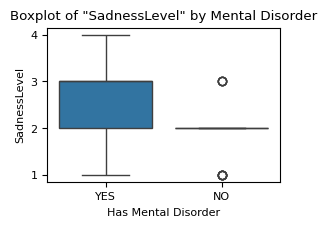

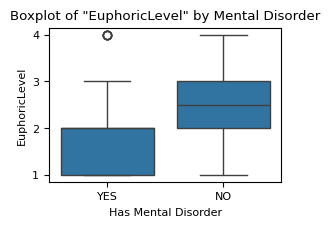

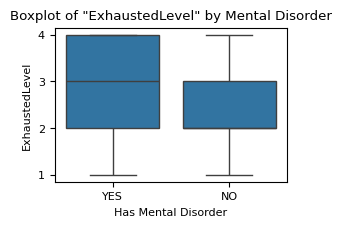

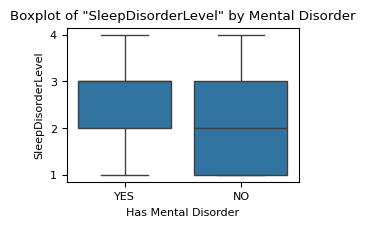

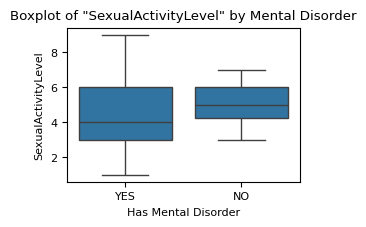

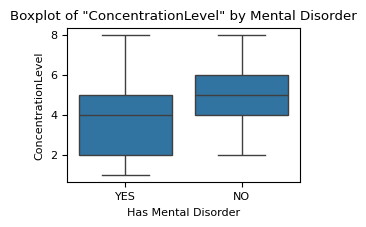

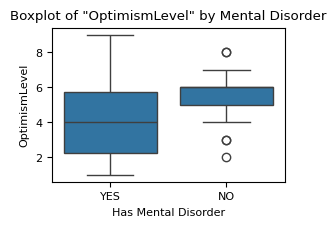

In [29]:
# Define the levels
levels = ['SadnessLevel', 'EuphoricLevel', 'ExhaustedLevel', 'SleepDisorderLevel', 'SexualActivityLevel', 'ConcentrationLevel', 'OptimismLevel']

# Iterate over each level and create a boxplot, group the patient by Diagnosis
for level in levels:
    plt.figure(figsize=(3, 2))  # Set the figure size
    sns.boxplot(x='HasMentalDisorder', y=level, data=df_data)
    plt.xlabel('Has Mental Disorder'); plt.ylabel(level); plt.title(f'Boxplot of "{level}" by Mental Disorder')
    plt.show()  # Show the plot for each level

#### From the above 7 boxplots, we may conclude that most patients with mental disorder tend to experience increased sadness, decreased euphoria, a wider range of exhaustion levels, moderate levels of sleep disorders, a wider range of sexual activity levels, decreased concentration levels, and reduced optimism levels.

### Categorical Features using One-Hot Encoding

Before quantitative analysis, we need to convert those categorical features into numerical values. **From strings to Numbers!**

Here, we adopt one-hot encoding.

In [30]:
# Select all the categorical variables
category_df = df_data.select_dtypes('object')
category_df.head()   # head() shows first 5 records by default when number is not indicated

,Patient Number,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Diagnosis,HasMentalDisorder
21,Patiant-22,Usually,Sometimes,Sometimes,Sometimes,YES,YES,YES,NO,YES,YES,NO,NO,NO,YES,6 From 10,4 From 10,6 From 10,Bipolar Type-1,YES
72,Patiant-73,Sometimes,Seldom,Most-Often,Sometimes,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,7 From 10,5 From 10,7 From 10,Bipolar Type-1,YES
69,Patiant-70,Sometimes,Usually,Sometimes,Usually,NO,YES,NO,NO,NO,YES,NO,NO,YES,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-1,YES
67,Patiant-68,Sometimes,Seldom,Most-Often,Most-Often,YES,NO,YES,NO,YES,YES,NO,YES,YES,NO,8 From 10,4 From 10,5 From 10,Bipolar Type-1,YES
100,Patiant-101,Usually,Sometimes,Seldom,Usually,YES,NO,NO,NO,NO,YES,YES,NO,NO,YES,8 From 10,1 From 10,8 From 10,Bipolar Type-1,YES


In [31]:
# Drop 'Diagnosis' column from the DataFrame before creating dummy variables
category_df = category_df.drop(columns=['Patient Number'])

dummy_df = pd.get_dummies(category_df)  # Used in ML to convert categorical variables into numeric/binary that can be fed into ML models
dummy_df = dummy_df.astype(int)         # As the above code returned me True/False instead of 1/0, I added this line

In [32]:
dummy_df.head()

,Sadness_Most-Often,Sadness_Seldom,Sadness_Sometimes,Sadness_Usually,Euphoric_Most-Often,Euphoric_Seldom,Euphoric_Sometimes,Euphoric_Usually,Exhausted_Most-Often,Exhausted_Seldom,...,Optimism_6 From 10,Optimism_7 From 10,Optimism_8 From 10,Optimism_9 From 10,Diagnosis_Bipolar Type-1,Diagnosis_Bipolar Type-2,Diagnosis_Depression,Diagnosis_Normal,HasMentalDisorder_NO,HasMentalDisorder_YES
21,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
72,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
69,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
67,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
100,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1


## Variable Correlations with Diagnosis

### Cramér's V statistic to compute the association strength between "Diagnosis" categorical variable and the other categorical variables

In [33]:
from scipy.stats import chi2_contingency

# Create a function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    
    # Handle potential division by zero or NaN situations
    if min((kcorr - 1), (rcorr - 1)) == 0:
        return np.nan
    else:
        return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for each categorical input feature
categorical_features = df_data.select_dtypes(include=['object', 'category']).columns
cramer_vs = {}
for feature in categorical_features:
    confusion_matrix = pd.crosstab(df_data[feature], df_data['Diagnosis'])
    cramers_v_score = cramers_v(confusion_matrix)
    cramer_vs[feature] = cramers_v_score

# Sort scores in ascending order to improve readability
sorted_cramer_vs = sorted(cramer_vs.items(), key=lambda x: x[1])

# Print scores in ascending order
for feature, score in sorted_cramer_vs:
    print(f"Cramér's V for {feature}: {score:.5f}")   # round off to show in 5 decimal places

Cramér's V for Patient Number: nan
Cramér's V for Try-Explanation: 0.00000
Cramér's V for Admit Mistakes: 0.15098
Cramér's V for Concentration: 0.15998
Cramér's V for Anorexia: 0.17576
Cramér's V for Sleep disorder: 0.19634
Cramér's V for Ignore & Move-On: 0.22300
Cramér's V for Exhausted: 0.24011
Cramér's V for Overthinking: 0.24662
Cramér's V for Euphoric: 0.32268
Cramér's V for Nervous Break-down: 0.34897
Cramér's V for Authority Respect: 0.37133
Cramér's V for Sadness: 0.37957
Cramér's V for Sexual Activity: 0.38598
Cramér's V for Aggressive Response: 0.39988
Cramér's V for Optimism: 0.42957
Cramér's V for Suicidal thoughts: 0.51649
Cramér's V for Mood Swing: 0.92747
Cramér's V for HasMentalDisorder: 0.99149
Cramér's V for Diagnosis: 1.00000


#### The above result suggested that these potential input variables have relatively higher Cramér's V values compared to others, suggesting stronger associations with "Diagnosis":
- Mood Swing: 0.92747
- Suicidal Thoughts: 0.51649
- Optimism: 0.42957
- Aggressive Response: 0.39988
- Sexual Activity: 0.38598
- Sadness: 0.37957
- Authority Respect: 0.37133
- Nervous Break-down: 0.34897
- etc
#### Also, it was suggested that the "Try-Explanation" variable (having an association score of 0) can be excluded from the input features, since it is not useful to predict "Diagnosis".

In [34]:
dummy_df.head()

,Sadness_Most-Often,Sadness_Seldom,Sadness_Sometimes,Sadness_Usually,Euphoric_Most-Often,Euphoric_Seldom,Euphoric_Sometimes,Euphoric_Usually,Exhausted_Most-Often,Exhausted_Seldom,...,Optimism_6 From 10,Optimism_7 From 10,Optimism_8 From 10,Optimism_9 From 10,Diagnosis_Bipolar Type-1,Diagnosis_Bipolar Type-2,Diagnosis_Depression,Diagnosis_Normal,HasMentalDisorder_NO,HasMentalDisorder_YES
21,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
72,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
69,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
67,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
100,0,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1


### Correlations with "HasMentalDisorder_YES" (having any valid mental disorder) -> Broader perspective
#### On one-hot encoded dataframe (showing all columns since non-numeric columns had been converted to binary/one-hot encoding in dummy_df)

In [35]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Display the correlations
dummy_df.corr()['HasMentalDisorder_YES'].sort_values().round(5)   # round off to show in 5 decimal places

Diagnosis_Normal            -1.00000
HasMentalDisorder_NO        -1.00000
Mood Swing_NO               -0.51063
Suicidal thoughts_NO        -0.47209
Sleep disorder_Seldom       -0.39253
Sadness_Sometimes           -0.38331
Nervous Break-down_NO       -0.36586
Optimism_6 From 10          -0.34188
Authority Respect_YES       -0.32527
Sexual Activity_5 From 10   -0.32329
Euphoric_Usually            -0.30984
Exhausted_Sometimes         -0.26891
Optimism_5 From 10          -0.25820
Overthinking_NO             -0.24140
Anorexia_NO                 -0.17812
Admit Mistakes_YES          -0.16361
Ignore & Move-On_YES        -0.13663
Aggressive Response_NO      -0.13479
Euphoric_Most-Often         -0.12787
Sadness_Seldom              -0.11323
Concentration_8 From 10     -0.10721
Concentration_6 From 10     -0.10445
Concentration_7 From 10     -0.08992
Sexual Activity_7 From 10   -0.08992
Concentration_5 From 10     -0.08864
Sexual Activity_6 From 10   -0.07274
Concentration_4 From 10     -0.03233
E

#### The above result suggested that these potential input variables have relatively higher correlation coefficients with "HasMentalDisorder_YES", suggesting stronger associations with the presence of a mental disorder. Conversely, variables such as "Mood Swing_NO" and "Suicidal thoughts_NO" have relatively higher negative correlation values with "HasMentalDisorder_YES", indicating a tendency to be negatively associated with it.
- Mood Swing_YES: 0.51063
- Suicidal Thoughts_YES: 0.47209
- Nervous Break-down_YES: 0.36586
- Authority Respect_NO: 0.32527
- Euphoric_Seldom: 0.29687
- Sadness_Usually: 0.26227
- Sadness_Most-Often: 0.25820
- Exhausted_Most-Often: 0.24444
- Overthinking_YES: 0.24140
- etc

### Correlations with a specific mental disorder Diagnosis -> Narrower perspective

In [36]:
dummy_df.corr()['Diagnosis_Bipolar Type-1'].sort_values().round(5)   # round off to show in 5 decimal places

Mood Swing_NO               -0.46162
Aggressive Response_NO      -0.41267
Diagnosis_Depression        -0.32559
Diagnosis_Bipolar Type-2    -0.32559
Diagnosis_Normal            -0.31851
HasMentalDisorder_NO        -0.31851
Ignore & Move-On_YES        -0.26643
Sadness_Most-Often          -0.24672
Sexual Activity_4 From 10   -0.24672
Sexual Activity_2 From 10   -0.20851
Authority Respect_YES       -0.20048
Admit Mistakes_YES          -0.18786
Concentration_3 From 10     -0.18389
Optimism_3 From 10          -0.17657
Optimism_2 From 10          -0.17657
Anorexia_NO                 -0.17290
Sexual Activity_3 From 10   -0.16762
Euphoric_Seldom             -0.15129
Sleep disorder_Seldom       -0.15038
Euphoric_Sometimes          -0.14244
Concentration_7 From 10     -0.13912
Optimism_4 From 10          -0.13133
Exhausted_Usually           -0.12826
Optimism_1 From 10          -0.12656
Sadness_Usually             -0.11566
Sexual Activity_1 From 10   -0.10244
Exhausted_Most-Often        -0.09100
S

#### The above result suggested that these potential input variables with positive correlations are positively associated with "Bipolar Type-1" disorder, while variables with negative correlations are negatively associated, indicating a tendency to be negatively associated with this diagnosis. Conversely, variables such as "Mood Swing_NO" and "Aggressive Response_NO" have relatively higher negative correlation values with "Bipolar Type-1" disorder, indicating a tendency to be negatively associated with it.
- Mood Swing_YES: 0.46162
- Aggressive Response_YES: 0.41267
- etc

In [37]:
dummy_df.corr()['Diagnosis_Bipolar Type-2'].sort_values().round(5)   # round off to show in 5 decimal places

Mood Swing_NO               -0.62047
Diagnosis_Depression        -0.34831
Diagnosis_Normal            -0.34074
HasMentalDisorder_NO        -0.34074
Diagnosis_Bipolar Type-1    -0.32559
Suicidal thoughts_NO        -0.31548
Euphoric_Usually            -0.26394
Nervous Break-down_NO       -0.22795
Optimism_6 From 10          -0.22171
Sadness_Sometimes           -0.19359
Sexual Activity_5 From 10   -0.18123
Sadness_Seldom              -0.17548
Euphoric_Most-Often         -0.16805
Sexual Activity_6 From 10   -0.16550
Optimism_7 From 10          -0.15773
Optimism_8 From 10          -0.15773
Concentration_7 From 10     -0.15518
Sexual Activity_7 From 10   -0.15518
Sexual Activity_8 From 10   -0.12151
Sleep disorder_Seldom       -0.12150
Authority Respect_NO        -0.11148
Optimism_5 From 10          -0.11068
Concentration_8 From 10     -0.10959
Concentration_6 From 10     -0.10906
Exhausted_Seldom            -0.08797
Anorexia_NO                 -0.08288
Optimism_9 From 10          -0.07684
I

#### The above result suggested that these potential input variables have relatively higher positive correlation values with "Bipolar Type-2" disorder, indicating a stronger association with this particular diagnosis. Conversely, variables such as "Mood Swing_NO" and "Suicidal thoughts_NO" have relatively higher negative correlation values with "Bipolar Type-2" disorder, indicating a tendency to be negatively associated with it.
- Mood Swing_YES: 0.62047
- Sexual Activity_2 From 10: 0.35259
- Optimism_4 From 10: 0.31769
- Suicidal thoughts_YES: 0.31548
- etc

In [38]:
dummy_df.corr()['Diagnosis_Depression'].sort_values().round(5)   # round off to show in 5 decimal places

Mood Swing_YES              -0.56137
Exhausted_Sometimes         -0.36084
Diagnosis_Bipolar Type-2    -0.34831
HasMentalDisorder_NO        -0.34074
Diagnosis_Normal            -0.34074
Diagnosis_Bipolar Type-1    -0.32559
Sadness_Sometimes           -0.27342
Optimism_6 From 10          -0.27182
Euphoric_Usually            -0.26394
Authority Respect_YES       -0.23954
Suicidal thoughts_NO        -0.23923
Overthinking_NO             -0.23722
Sadness_Seldom              -0.23149
Aggressive Response_YES     -0.22795
Euphoric_Most-Often         -0.16805
Sexual Activity_6 From 10   -0.16550
Sexual Activity_5 From 10   -0.13202
Concentration_1 From 10     -0.12306
Sleep disorder_Seldom       -0.12150
Optimism_5 From 10          -0.11068
Sexual Activity_7 From 10   -0.09588
Exhausted_Seldom            -0.08797
Optimism_7 From 10          -0.08141
Optimism_8 From 10          -0.08141
Ignore & Move-On_NO         -0.08045
Sexual Activity_9 From 10   -0.07684
Optimism_9 From 10          -0.07684
N

#### The above result suggested that these potential input variables have relatively higher positive correlation values with "Depression" disorder, indicating a stronger association with this particular diagnosis. Conversely, variables such as "Mood Swing_YES" and "Exhausted_Sometimes" have relatively higher negative correlation values with "Depression" disorder, indicating a tendency to be negatively associated with it.

- Mood Swing_NO: 0.56137
- Sadness_Most-Often: 0.34908
- Optimism_2 From 10: 0.33857
- Euphoric_Seldom: 0.27867
- etc